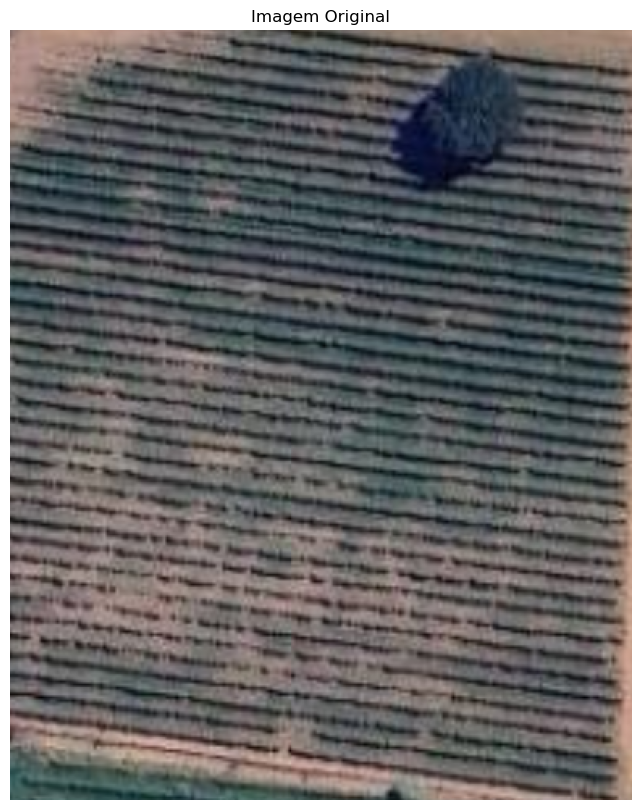

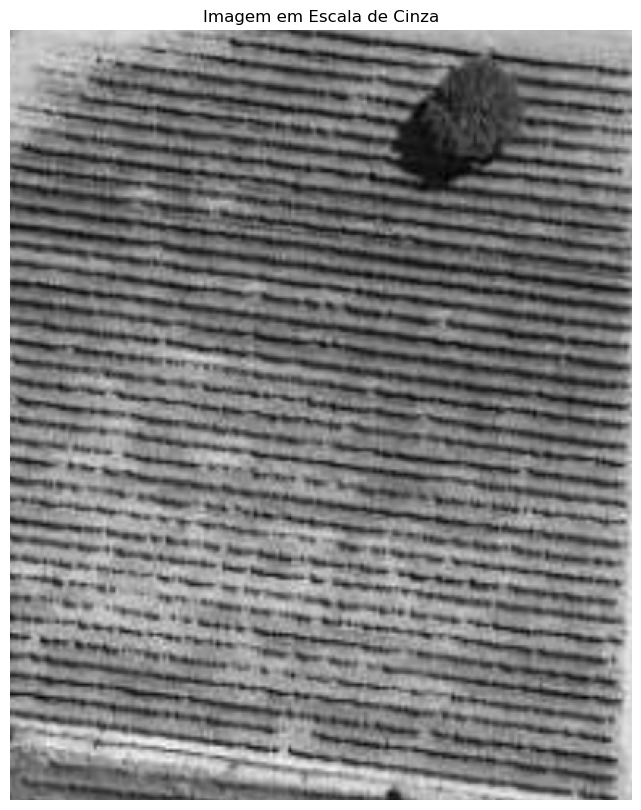

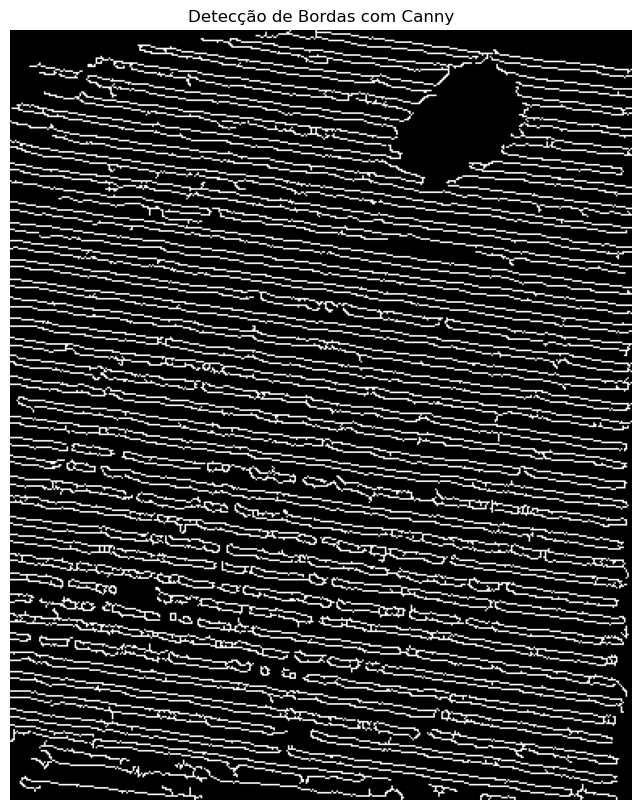

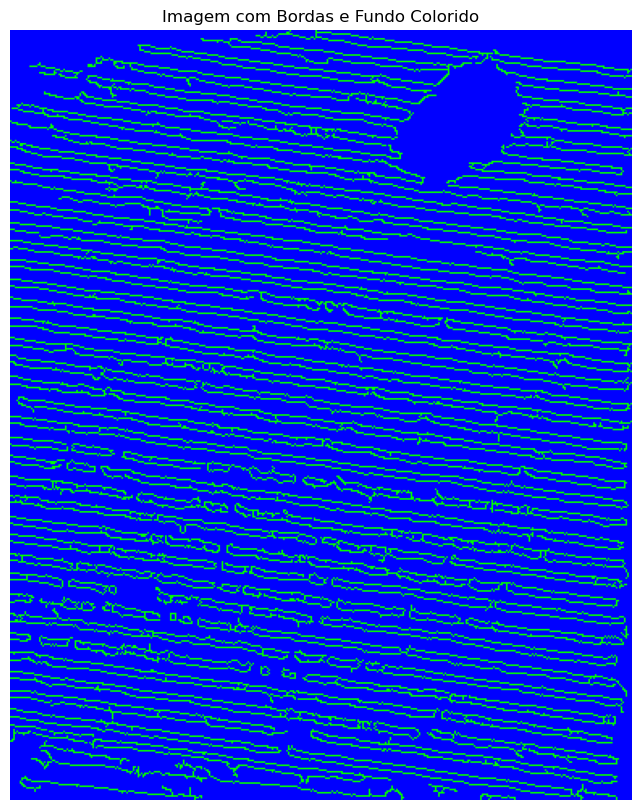

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_image(title, img, cmap_type=None):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if cmap_type:
        plt.imshow(img, cmap=cmap_type)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


image = cv2.imread('cafe3.png')


show_image("Imagem Original", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image("Imagem em Escala de Cinza", gray, cmap_type='gray')


blurred = cv2.GaussianBlur(gray, (5, 5), 0)


canny_edges = cv2.Canny(blurred, 50, 150) 
show_image("Detecção de Bordas com Canny", canny_edges, cmap_type='gray')


image_with_color = np.zeros_like(image)


image_with_color[:] = (255, 0, 0)  


contours, _ = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for contour in contours:
    
    cv2.drawContours(image_with_color, [contour], -1, (0, 255, 0), 1)  


show_image("Imagem com Bordas e Fundo Colorido", image_with_color)

